<a href="https://colab.research.google.com/github/Fukuchi8888/Kagawa/blob/main/Ennsyuu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **演習問題**

**ライブラリの読み込み**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from sklearn.datasets import load_wine

**データの収集**

In [ ]:
data_wine=load_wine()

In [ ]:
data_wine.data.shape

(178, 13)

In [ ]:
df_wine=pd.DataFrame(data_wine.data,columns=data_wine.feature_names)
df_wine["label"]=data_wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


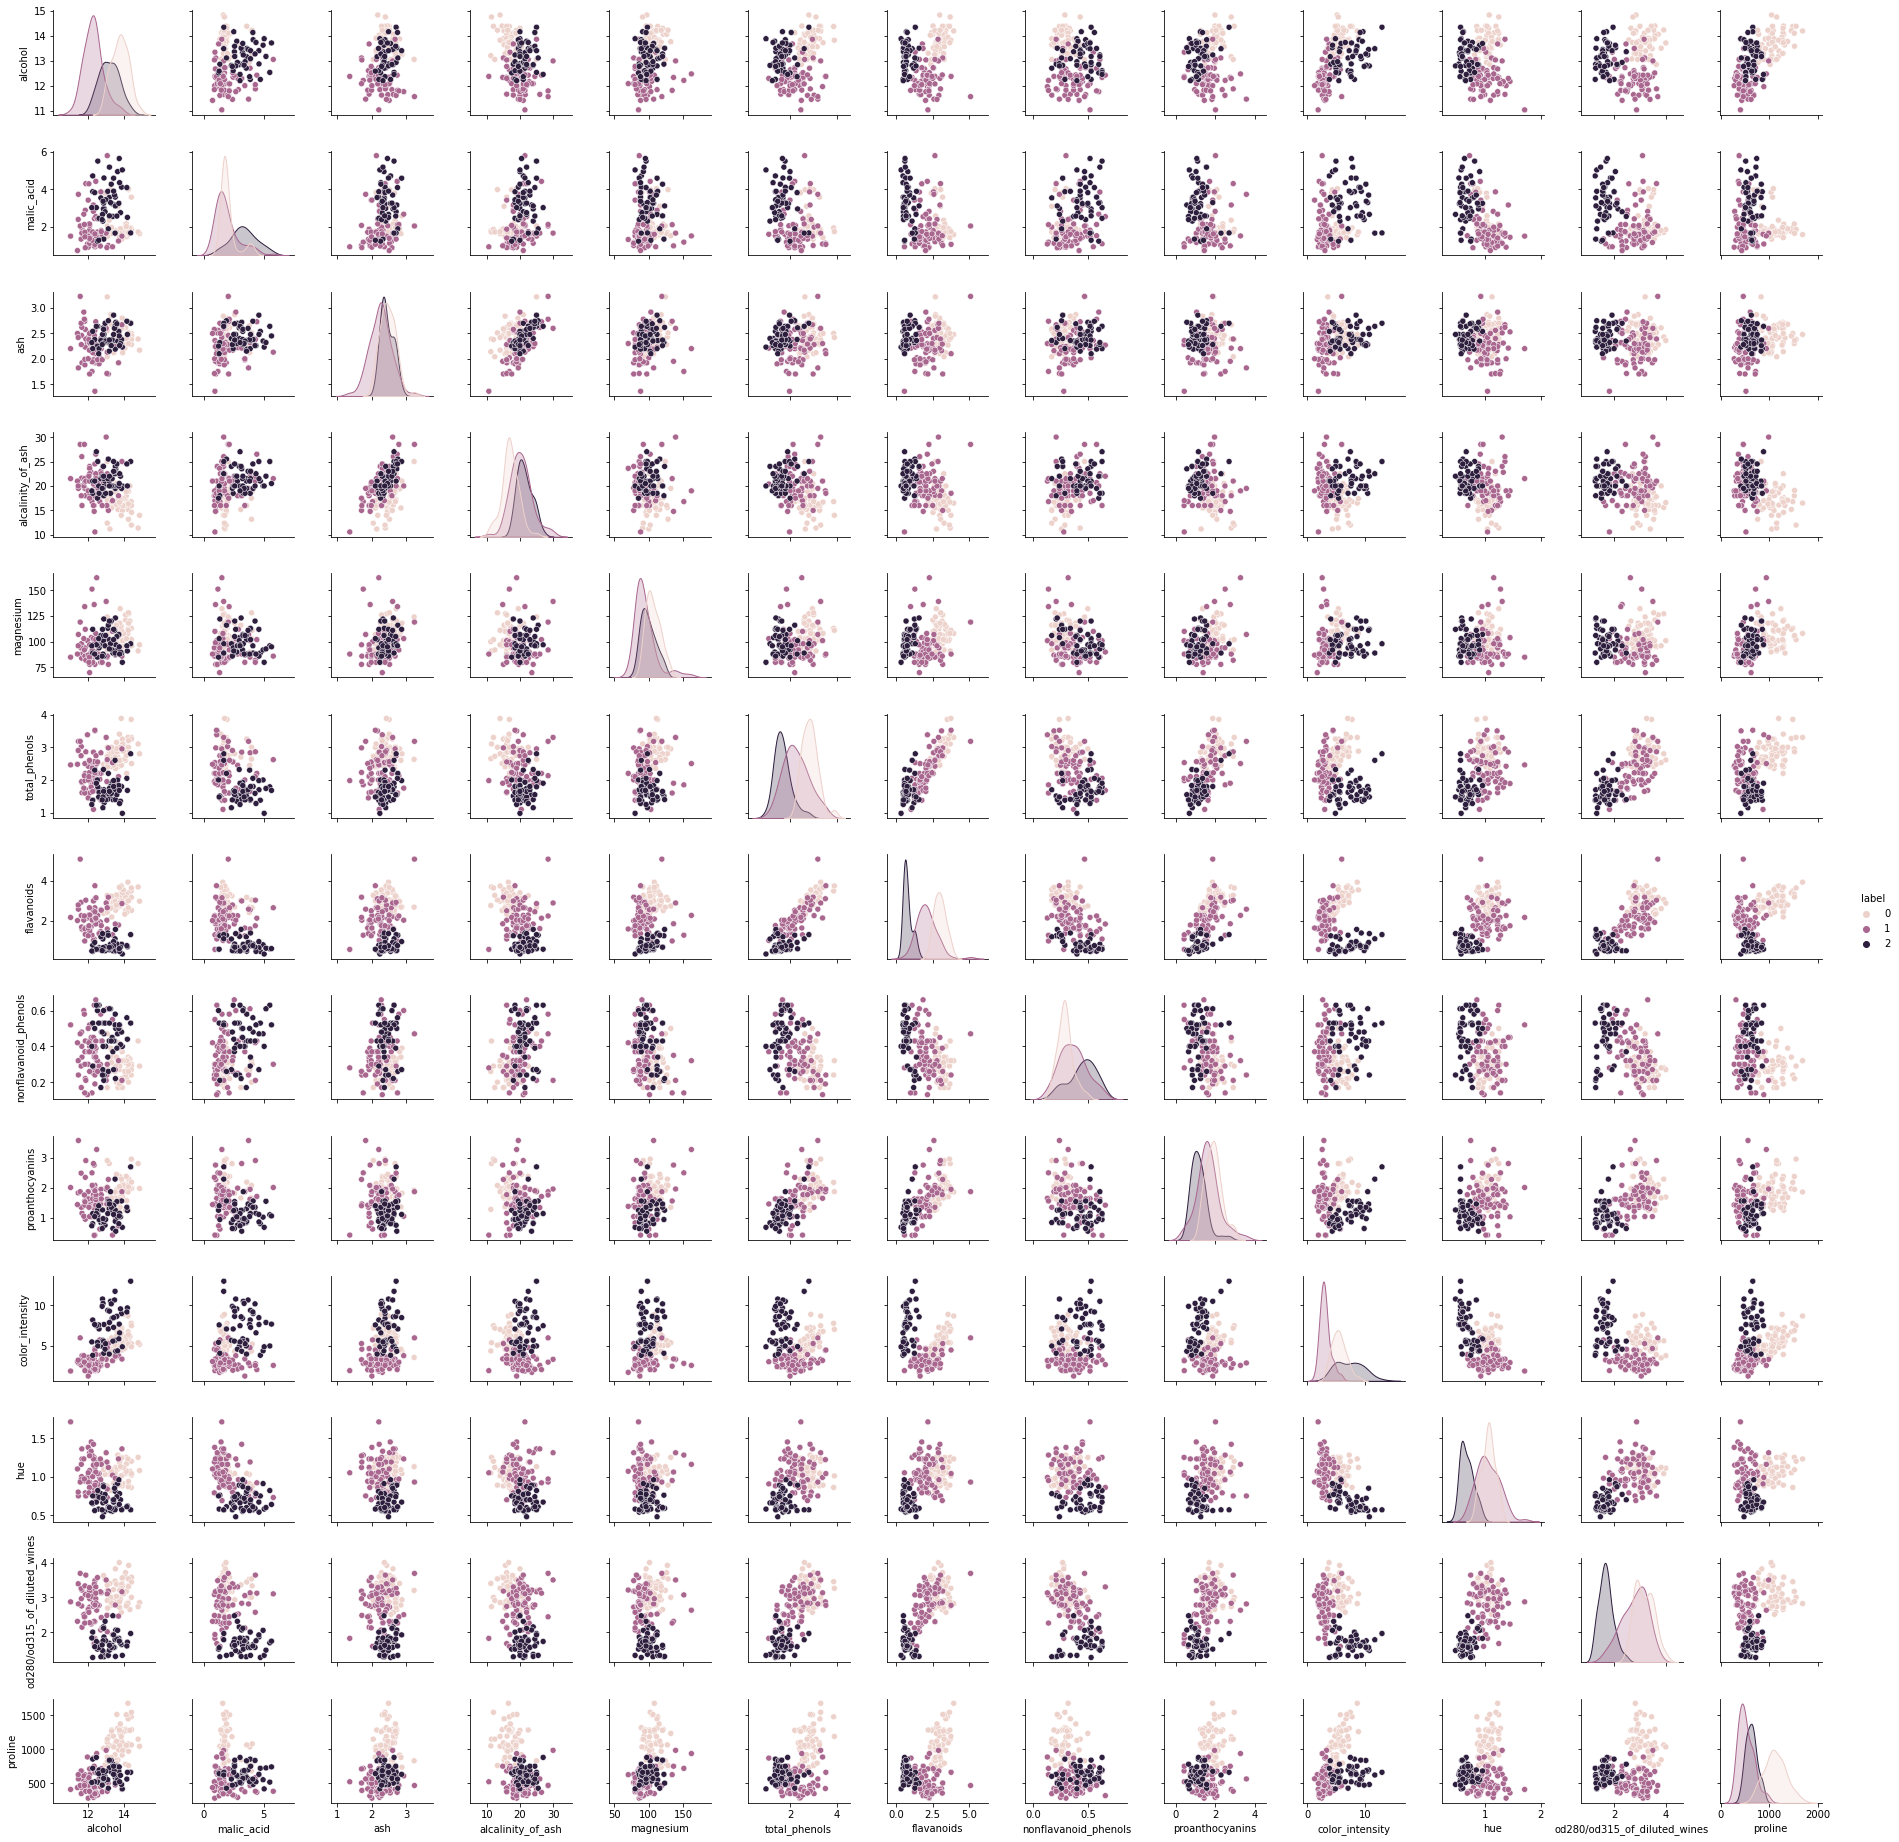

In [ ]:
sns.pairplot(df_wine,hue="label",size=2)

**データの前処理**

In [ ]:
data_X=data_wine.data
data_y=data_wine.target

data_X=preprocessing.scale(data_X)
data_y=to_categorical(data_y)

X_train,X_test, y_train, y_test=train_test_split(data_X, data_y, test_size=0.3, random_state=0)

**モデルの作成**

In [ ]:
model_wine=Sequential()
model_wine.add(Dense(100, input_dim=13, activation="sigmoid"))
model_wine.add(Dense(100, activation="sigmoid"))
model_wine.add(Dense(100, activation="sigmoid"))
model_wine.add(Dense(3, activation="softmax"))

model_wine.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

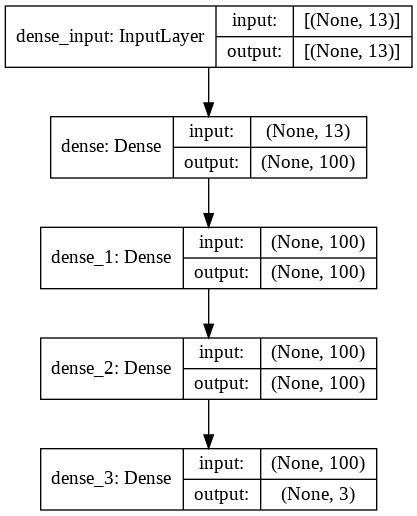

In [ ]:
plot_model(model_wine, to_file='wine_model.png', show_shapes=True)

**学習の実行**

In [ ]:
history_wine=model_wine.fit(X_train,y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 14s - loss: 1.1140 - accuracy: 0.3952
Epoch 2/100
4/4 - 0s - loss: 1.0699 - accuracy: 0.5565
Epoch 3/100
4/4 - 0s - loss: 1.0734 - accuracy: 0.3790
Epoch 4/100
4/4 - 0s - loss: 1.0542 - accuracy: 0.4758
Epoch 5/100
4/4 - 0s - loss: 1.0459 - accuracy: 0.3952
Epoch 6/100
4/4 - 0s - loss: 1.0287 - accuracy: 0.3952
Epoch 7/100
4/4 - 0s - loss: 1.0104 - accuracy: 0.4113
Epoch 8/100
4/4 - 0s - loss: 0.9977 - accuracy: 0.6613
Epoch 9/100
4/4 - 0s - loss: 0.9758 - accuracy: 0.8548
Epoch 10/100
4/4 - 0s - loss: 0.9463 - accuracy: 0.7823
Epoch 11/100
4/4 - 0s - loss: 0.9192 - accuracy: 0.6290
Epoch 12/100
4/4 - 0s - loss: 0.8810 - accuracy: 0.7016
Epoch 13/100
4/4 - 0s - loss: 0.8379 - accuracy: 0.8871
Epoch 14/100
4/4 - 0s - loss: 0.7955 - accuracy: 0.9597
Epoch 15/100
4/4 - 0s - loss: 0.7404 - accuracy: 0.9597
Epoch 16/100
4/4 - 0s - loss: 0.6847 - accuracy: 0.9355
Epoch 17/100
4/4 - 0s - loss: 0.6279 - accuracy: 0.9274
Epoch 18/100
4/4 - 0s - loss: 0.5712 - accuracy: 0.9435


<function matplotlib.pyplot.show>

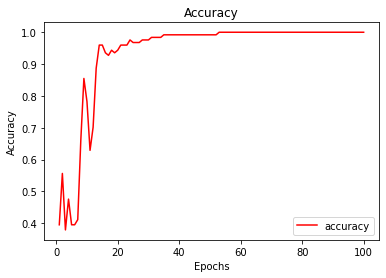

In [ ]:
wine_loss=history_wine.history["loss"]
wine_accuracy=history_wine.history["accuracy"]
epochs=range(1,len(wine_loss)+1)

plt.plot(epochs,wine_accuracy,color="red",label="accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

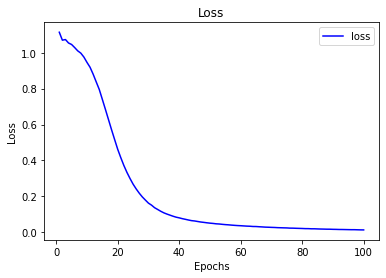

In [ ]:
plt.plot(epochs,wine_loss,color="blue",label="loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

**モデルの評価**

In [ ]:
test_loss, test_accuracy=model_wine.evaluate(X_test,y_test, verbose=2)
print("loss : {0} \n accuracy : {1}".format(test_loss, test_accuracy))

2/2 - 0s - loss: 0.0092 - accuracy: 1.0000
loss : 0.00920209102332592 
 accuracy : 1.0
